#Import Libraries

In [ ]:
# A module for virtualization
import matplotlib.pyplot as plt
import seaborn as sns

# A module for handling data
import pandas as pd
# A module that helps finding all pathnames that match a certain pattern
import glob

# A class that will be used to count the number of times a word has occurred in a text
from sklearn.feature_extraction.text import CountVectorizer

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The multinomial type of the Naive Bayes classfier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Importing different metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# The Python package for scientific computing
import numpy as np

#metrics for reports and vertualization
from sklearn.metrics import roc_curve , roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

#Reading The Data

In [146]:
# Using the 'glob()' method, create a variable of type 'list' called 'files'. 
# It stores the paths of all files in the folder 'youtube-dataset' whose extension is .csv.
files = glob.glob('/content/*.csv')
files

['/content/Youtube03.csv',
 '/content/Youtube02.csv',
 '/content/Youtube04.csv',
 '/content/Youtube05.csv',
 '/content/Youtube01.csv']

In [147]:
all_df = []
for i in files:
  all_df.append(pd.read_csv(i))

In [148]:
all_df[0].head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [ ]:
all_df = []
for i in files:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [140]:
all_df[0].head()

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0


In [141]:
# Create a dataframe that combines all pandas dataframes from the 'all_df' list
data = pd.concat(all_df, axis=0, ignore_index=True)
data.head()

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0


In [142]:
print('Shape of the Data:', data.shape,'\n')

Shape of the Data: (1955, 2) 



In [ ]:
# Check for null values. In this case, there aren't any.
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
# Check the number of representatives from each class. 
# In this case, the data is reasonably balanced.
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

In [ ]:
def dist_plot(X):
  plt.figure(figsize=(12,7))
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=data[X].value_counts().index, y=data[X].value_counts().values)
  plt.xticks(rotation='0', fontsize=14, fontweight='bold')
  plt.xlabel(X, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                  textcoords='offset points')
  # plt.grid()
  plt.show()

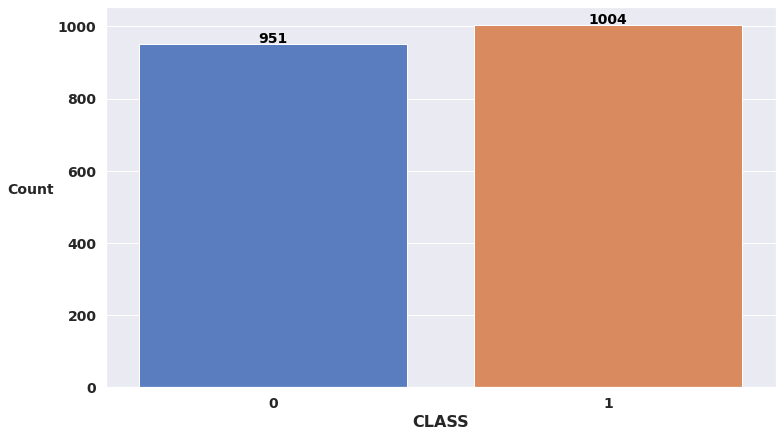

In [ ]:
dist_plot("CLASS")

# Explain the meaning of vectorization


In [ ]:
# Define a list storing a single string
message_sample = ['This is a dog']

# Define an instance of the CountVectorizer class
vectorizer_sample = CountVectorizer()

# Learn a vocabulary dictionary of all tokens in 'message_sample'. A token is a word consisting of at least 2 letters.
vectorizer_sample.fit(message_sample)

CountVectorizer()

In [ ]:
# Transform the document into a document-term matrix. 
# Each 1 in the matrix represents the presence of a certain word in the fitted string(s).
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]])

In [ ]:
# Output the words that represent each column in the matrix above.
# For example, the first 1 in the matrix above corresponds to the presence of the word 'dog' in the string.
# The 2nd 1 means that the string also includes the word 'is'.
# The 3rd one means that the word 'this' is also present in the string
# Notice how the article 'a' is not included in the list of tokens, as it consists of only one letter.
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [ ]:
# Apply the 'transform()' method to a new string and check which of the tokenized words are present.
# We can see a 0 in the first column.
# This indicate that the word 'dog' is absent from the transformed string.
vectorizer_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]])

In [ ]:
# Define a list storing two strings
message_sample2 = ['This is a dog and that is a dog', 'This is a cat']

# Define another instance of the CountVectorizer class
vectorizer_sample2 = CountVectorizer()

# Apply the 'fit()' and the 'transform()' methods simultaneously
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]])

In [ ]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [ ]:
vectorizer_sample2.transform(['Those are birds.']).toarray()

array([[0, 0, 0, 0, 0, 0]])

# Data Preprocessing

> ## Train test splite

In [ ]:
# Define the inputs and the target
X = data['CONTENT']
Y = data['CLASS']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=365, stratify = Y)

In [ ]:
print('Shape of the x_train:', x_train.shape,'\n')
print('Shape of the x_test:', x_test.shape,'\n')
print('Shape of the y_train:', y_train.shape,'\n')
print('Shape of the y_test:', y_test.shape)

Shape of the x_train: (1564,) 

Shape of the x_test: (391,) 

Shape of the y_train: (1564,) 

Shape of the y_test: (391,)


In [ ]:
y_train.value_counts(normalize = True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

> ## Tokenization

In [ ]:
# Create an instance of the vectorizer class.
vectorizer = CountVectorizer()

In [ ]:
# Apply the fit_transform() method on the training data and the transform() method on the test data.
# Note that we split the data *before* applying the 'fit_tranform()' method!
# The 'fit_transform()' method is to be applied *only* on the training data!
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [ ]:
# Check how the 'x_train_transf' matrix looks like.
# It is a sparse matrix i.e., contains mainly zeros.
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print('Shape of the x_train_transf:', x_train_transf.shape)
print('Shape of the x_test_transf:', x_test_transf.shape)

Shape of the x_train_transf: (1564, 3863)
Shape of the x_test_transf: (391, 3863)


# First Trial

## Training Model

In [ ]:
# Create an instance of the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Fit the model to the training data
clf.fit(x_train_transf, y_train)

MultinomialNB()

In [ ]:
# Return the parameters of the classifier
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

## Model Evaluation

In [ ]:
# Predict the target of the observations in the test set
y_test_pred = clf.predict(x_test_transf)

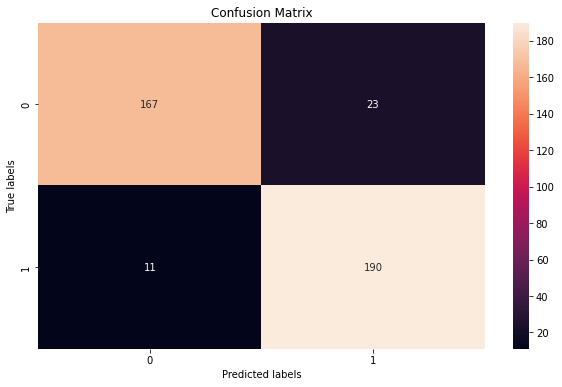

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_test_pred)

# drawing confusion matrix
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
# The classification report consists of the precision, recall and f1-score of each class as well as
# the overall accuracy of the model.
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.88      0.91       190
        Spam       0.89      0.95      0.92       201

    accuracy                           0.91       391
   macro avg       0.92      0.91      0.91       391
weighted avg       0.91      0.91      0.91       391



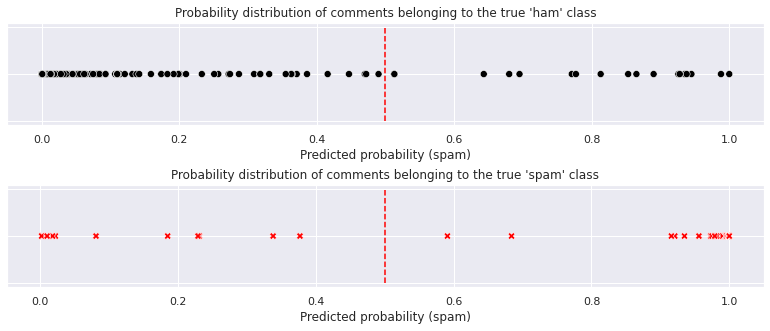

In [ ]:
# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop = True)

# Define two palettes for the different plots
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to 
# the number of samples whose true class is 0.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored. In this case,
# this feature has only a single class - the 0 class.
# The 's' parameter specifies the size of the points.
# The 'markers' parameter determines the shape of the points.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'style' parameter connects markers to classes.
# We have decided to set the 'legend' parameter equal to False as we have only one class in the plot. 
# We decide to remove the ticks from the y-axis as they can be chosen arbitrarily.
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')

# Create a red vertical dashed line passing through the point x = 0.5
# The first parameter specifies the x-coordinate.
# The second and third parameters specify the min and the max y-coordinates.
# We choose a dashed linestyle.
# We color the line in red.
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

##Making predictions

In [ ]:
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [ ]:
clf.predict(predict_data)

array([0, 1])

# Second Trial

## Training Model

In [ ]:
# Create an instance of the Multinomial Naive Bayes classifier
clf = MultinomialNB(class_prior = np.array([0.6, 0.4]), fit_prior = False)

# Fit the model to the training data
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]), fit_prior=False)

In [ ]:
# Return the parameters of the classifier
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.6, 0.4]), 'fit_prior': False}

## Model Evaluation

In [ ]:
# Predict the target of the observations in the test set
y_test_pred = clf.predict(x_test_transf)

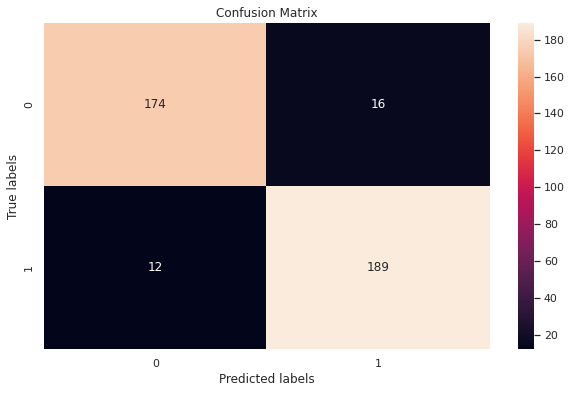

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_test_pred)

# drawing confusion matrix
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
# The classification report consists of the precision, recall and f1-score of each class as well as
# the overall accuracy of the model.
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.92      0.93       190
        Spam       0.92      0.94      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



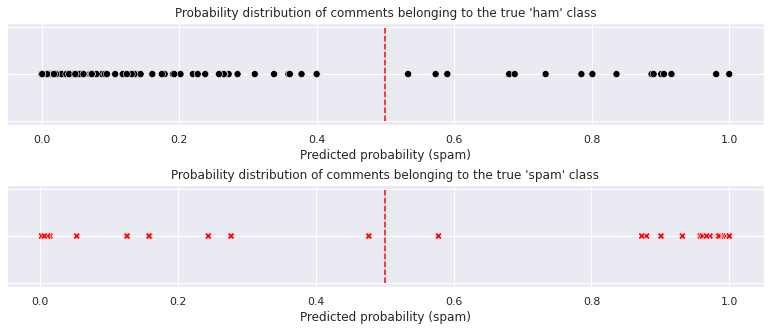

In [ ]:
# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop = True)

# Define two palettes for the different plots
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to 
# the number of samples whose true class is 0.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored. In this case,
# this feature has only a single class - the 0 class.
# The 's' parameter specifies the size of the points.
# The 'markers' parameter determines the shape of the points.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'style' parameter connects markers to classes.
# We have decided to set the 'legend' parameter equal to False as we have only one class in the plot. 
# We decide to remove the ticks from the y-axis as they can be chosen arbitrarily.
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')

# Create a red vertical dashed line passing through the point x = 0.5
# The first parameter specifies the x-coordinate.
# The second and third parameters specify the min and the max y-coordinates.
# We choose a dashed linestyle.
# We color the line in red.
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

##Making predictions

In [ ]:
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [ ]:
clf.predict(predict_data)

array([0, 1])